# GOAL - Predict College Applications

In [1]:
import os
import numpy as np
#import statistics as stats
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import feature_selection, linear_model , metrics,discriminant_analysis , preprocessing , neighbors , cross_validation
from sklearn import utils , feature_selection , preprocessing , metrics , decomposition
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("College.csv")

In [3]:
df.head()

,NAME,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


- Private A factor with levels No and Yes indicating private or public university
- Apps Number of applications received
- Accept Number of applications accepted
- Enroll Number of new students enrolled
- Top10perc Pct. new students from top 10% of H.S. class
- Top25perc Pct. new students from top 25% of H.S. class
- F.Undergrad Number of fulltime undergraduates
- P.Undergrad Number of parttime undergraduates
- Outstate Out-of-state tuition
- Room.Board Room and board costs
- Books Estimated book costs
- Personal Estimated personal spending
- PhD Pct. of faculty with Ph.D.’s
- Terminal Pct. of faculty with terminal degree
- S.F.Ratio Student/faculty ratio
- perc.alumni Pct. alumni who donate
- Expend Instructional expenditure per student
- Grad.Rate Graduation rate

In [5]:
df = df.drop('NAME' , axis =1)

In [6]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


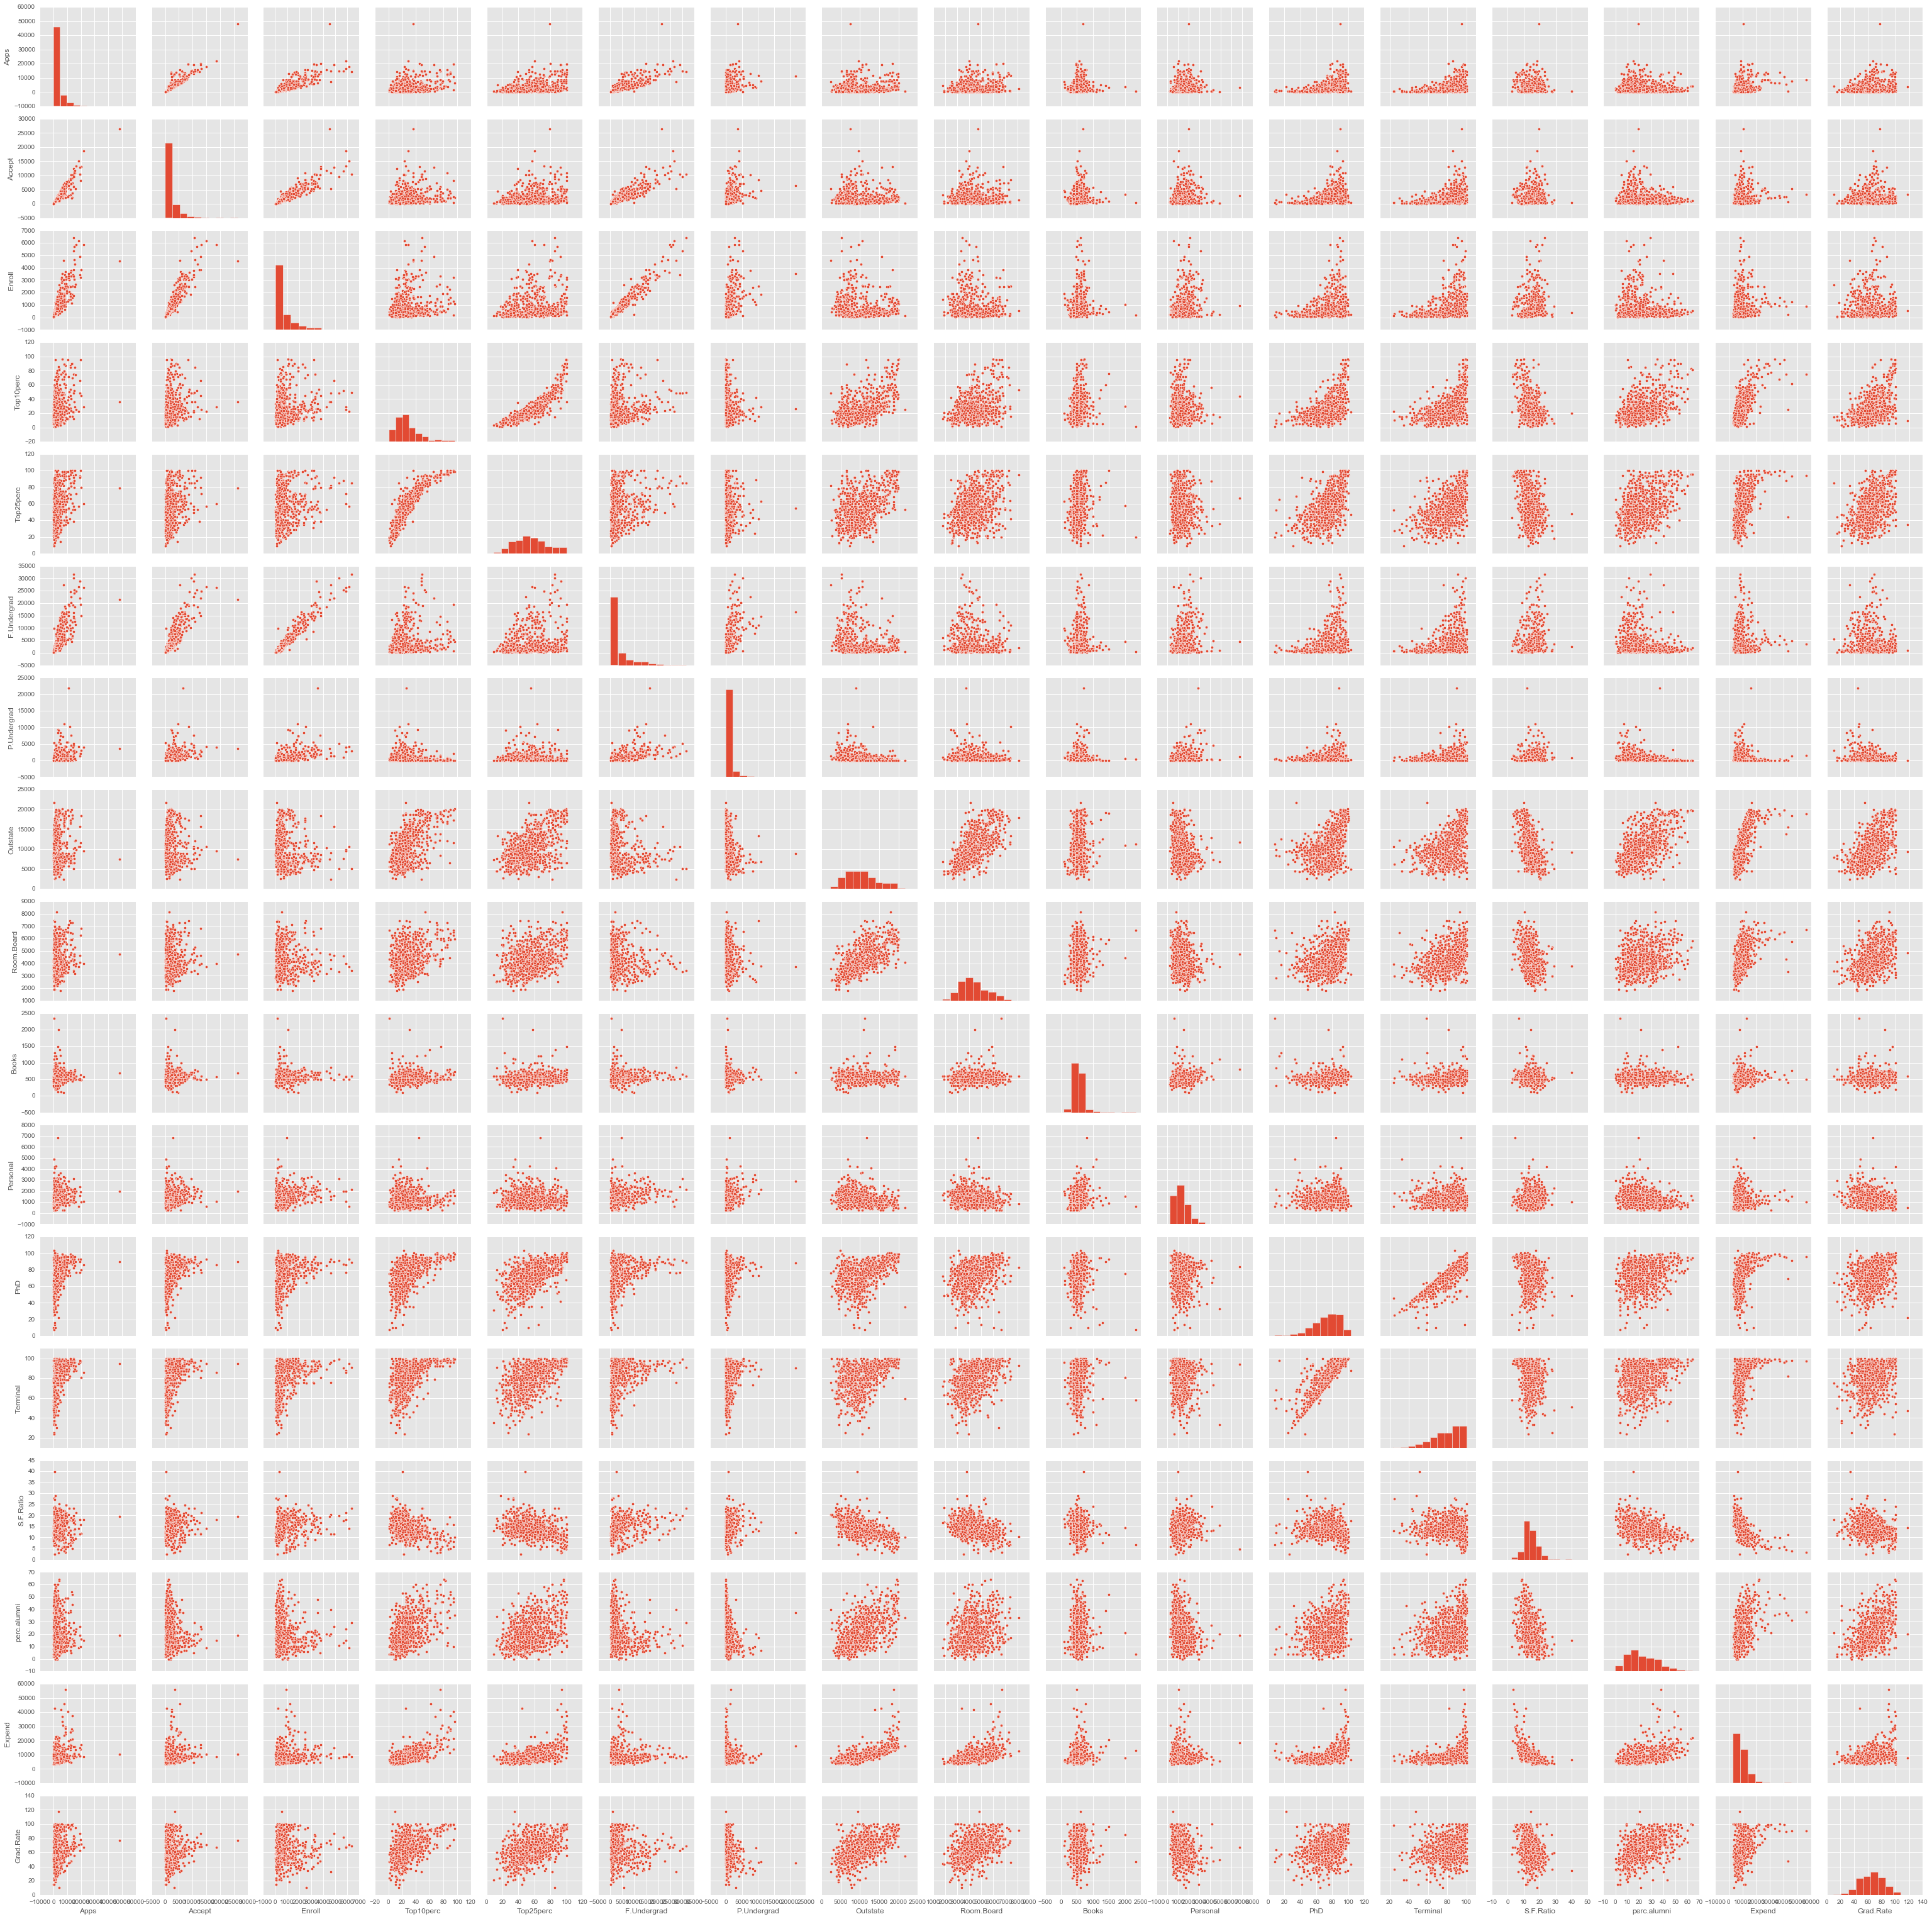

In [7]:
sns.pairplot(data = df)

Findings-:
- Apps which is the response variable seems to have a linear relationsip
- There doesnt appear to be any categorical variable , so no need for dummies

In [8]:
# defining the Predictor and the response spaces
X = df
X = df.drop('Apps' , axis =1)
y = df.Apps

In [10]:
X.info()
# THere are no Null objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
Private        777 non-null object
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(15), object(1)
memory usage: 103.3+ KB


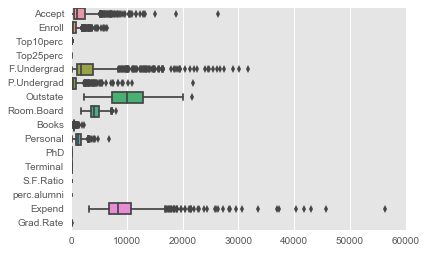

In [18]:
plt.plot(figsize = (80,80))
sns.boxplot(X , orient ='h')

A note on the Data :
- Accept (No of application accepted has a large no of outlier and it is expected of ivy leagues)
- F.undegrad/P.undergrad (has also a large number of outliers and it is ok to have it for part time college that is skewing up the mean


## Approach 1- Stats model,include all the predictors and see how it compares with the feature selection.

In [40]:
df.rename(index = str , columns = {'S.F.Ratio':"SF_RATIO" ,'F.Undergrad':"F_Undergrad",'P.Undergrad':"P_Undergrad" },inplace = True)

In [43]:
df.columns

Index([u'Private', u'Apps', u'Accept', u'Enroll', u'Top10perc', u'Top25perc',
       u'F_Undergrad', u'P_Undergrad', u'Outstate', u'Room.Board', u'Books',
       u'Personal', u'PhD', u'Terminal', u'SF_RATIO', u'perc.alumni',
       u'Expend', u'Grad.Rate'],
      dtype='object')

In [44]:
df.rename(columns = {'perc.alumni':'perc_alumni' ,'Grad.Rate':'Grad_Rate' } , inplace = True)

In [46]:
df.rename(columns = {'Room.Board':'Room_Board' } , inplace = True)

In [51]:
model_sm = smf.ols(formula = 'Apps ~ Private + Accept + Enroll + Top10perc +  Top25perc + F_Undergrad + P_Undergrad + Outstate + Room_Board +Books +Personal+PhD+Terminal+SF_RATIO+perc_alumni+Expend+Grad_Rate' , data =df).fit()

In [52]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Apps   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     585.9
Date:                Thu, 11 Aug 2016   Prob (F-statistic):               0.00
Time:                        06:33:16   Log-Likelihood:                -6492.2
No. Observations:                 777   AIC:                         1.302e+04
Df Residuals:                     759   BIC:                         1.310e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept       -445.0841    408.329     -1.090      0.276     -1246.672   356.503
Private[T.Yes]  -494.1490    137.812     -3.586      0.000      -764.687  -223.611
Accept             1.5858      0.041     38.924      0.000         1.506     1.666
Enroll            -0.8807      0.186     -4.736      0.000        -1.246    -0.516
Top10perc         49.9263      5.578      8.950      0.000        38.976    60.877
Top25perc        -14.2345      4.479     -3.178      0.002       -23.027    -5.441
F_Undergrad        0.0574      0.033      1.754      0.080        -0.007     0.122
P_Undergrad        0.0444      0.032      1.383      0.167        -0.019     0.108
Outstate          -0.0859      0.019     -4.506      0.000        -0.123    -0.048
Room_Board         0.1510      0.048      3.127      0.002         0.056     0.246
Books              0.0209      0.238      0.088      0.930        -0.447     0.489
Personal           0.0311      0.063      0.493      0.622        -0.093     0.155
PhD               -8.6785      4.638     -1.871      0.062       -17.784     0.427
Terminal          -3.3307      5.095     -0.654      0.513       -13.333     6.671
SF_RATIO          15.3896     13.006      1.183      0.237       -10.143    40.922
perc_alumni        0.1787      4.102      0.044      0.965        -7.875     8.232
Expend             0.0779      0.012      6.308      0.000         0.054     0.102
Grad_Rate          8.6676      2.949      2.939      0.003         2.879    14.457
==============================================================================
Omnibus:                      481.280   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9362.818
Skew:                           2.427   Prob(JB):                         0.00
Kurtosis:                      19.298   Cond. No.                     1.83e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

TypeError: return arrays must be of ArrayType

Findings- 
The following values should not be selected due to the high p values:
- Intercept
- F Undergrad
- P undergrad
- Books
- Personal
- PHD
- Terminal
- SF_Ratio
- Perc Alumni
- AIC and BIC approx suggestes that the MSE on the Test Data could most likely be around 71.52


# Lets explore the SelectKBest option

In [71]:
df.loc[(df.Private == 'No')] = 0
df.loc[(df.Private == 'Yes')] = 1

In [72]:
X = df
X = df.drop('Apps' , axis =1)
y = df.Apps

In [73]:
# train - Test split
train_X , test_X , train_y , test_y = cross_validation.train_test_split(X , y , test_size = .2 , random_state =0)

In [109]:
# Dataframe to hold the values for splits
df_Kbest_eval = pd.DataFrame({'Train_MSE':np.NAN , 'CV_MSE':np.nan , 'features':np.nan , 'betas':np.nan}, index = [0])

In [75]:
train_X.head()

,Private,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,SF_RATIO,perc_alumni,Expend,Grad_Rate
436,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0
230,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0,1,1,1
118,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0
253,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0,1,1,1
157,1,1,1,1,1,1,1,1,1,1,1,1,1,1.0,1,1,1


In [113]:
from sklearn.feature_selection import f_regression
for i in range(1,len(train_X.columns)):
    # creating an empty list to hold the values of coeff
    features = []
    betas = []

    Kbest = feature_selection.SelectKBest(f_regression ,  k= i).fit(train_X , train_y)
    # to get the indices for the best parameters
    indices = Kbest.get_support()
    
    Betas= Kbest.get_params(deep = True)
    
    #print " The following predictors indices are getting selected %r " %indices
    # the below for loop checks the values for the indices returened ,if true append in the list else continue
    for j in range(0,len(train_X.columns)):
        if (indices[j]):
            print " The currrent value of index selected is- %r " %j
            
            print " The column value is --%r " %train_X.columns[j]
            features.append(train_X.columns[j])
        else:
            continue
        
        
    train_X_new = Kbest.fit_transform(train_X , train_y)
#     print train_X_new.shape
#     print test_X.shape
    
    regr = linear_model.LinearRegression()
    regr.fit(train_X_new , train_y)
    # Scoring on training Data
    
    y_hat_train = regr.predict(train_X_new)
    train_MSE = ((y_hat_train - train_y)**2).mean()
    #y_hat_test = regr.predict(test_X_new)
    
    #train_score = regr.score(train_X_new , train_y)
    
    #Running and evaluating the CV score:
    cv_score = -1*cross_validation.cross_val_score(regr, train_X_new,  train_y,scoring = 'mean_squared_error',cv = 10).mean()
    
    # populating the Data Frame
    df_Kbest_eval.loc[i-1 , 'Train_MSE'] = train_MSE
    df_Kbest_eval.loc[i-1 , 'CV_MSE'] = cv_score
    print coeff 
    df_Kbest_eval.loc[i-1 , 'features'] = ", ".join(str(x) for x in features)
    df_Kbest_eval.loc[i-1 , 'betas'] = ", ".join(str(x) for x in Betas)


 The currrent value of index selected is- 16 
 The column value is --'Grad_Rate' 
['Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F_Undergrad', 'P_Undergrad', 'Outstate', 'Room_Board', 'Books', 'Personal', 'PhD', 'Terminal', 'SF_RATIO', 'perc_alumni', 'Expend', 'Grad_Rate']
 The currrent value of index selected is- 15 
 The column value is --'Expend' 
 The currrent value of index selected is- 16 
 The column value is --'Grad_Rate' 
['Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F_Undergrad', 'P_Undergrad', 'Outstate', 'Room_Board', 'Books', 'Personal', 'PhD', 'Terminal', 'SF_RATIO', 'perc_alumni', 'Expend', 'Grad_Rate']
 The currrent value of index selected is- 14 
 The column value is --'perc_alumni' 
 The currrent value of index selected is- 15 
 The column value is --'Expend' 
 The currrent value of index selected is- 16 
 The column value is --'Grad_Rate' 
['Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F_Undergrad', 'P_Undergrad', 'Outstate', 'Room_Board', 'Books', 'Personal', 'P

In [114]:
df_Kbest_eval

,CV_MSE,Train_MSE,betas,features
0,1.080111e-31,2.466977e-31,"k, score_func",Grad_Rate
1,7.258111e-32,6.627432e-32,"k, score_func","Expend, Grad_Rate"
2,1.760169e-31,3.947877e-32,"k, score_func","perc_alumni, Expend, Grad_Rate"
3,1.123706e-31,3.912150e-32,"k, score_func","SF_RATIO, perc_alumni, Expend, Grad_Rate"
4,1.749121e-31,1.232595e-32,"k, score_func","Terminal, SF_RATIO, perc_alumni, Expend, Grad_..."
5,2.430428e-31,1.346923e-31,"k, score_func","PhD, Terminal, SF_RATIO, perc_alumni, Expend, ..."
6,1.415894e-31,4.930381e-32,"k, score_func","Personal, PhD, Terminal, SF_RATIO, perc_alumni..."
7,1.632876e-31,1.752429e-31,"k, score_func","Books, Personal, PhD, Terminal, SF_RATIO, perc..."
8,4.111869e-32,4.930381e-32,"k, score_func","Room_Board, Books, Personal, PhD, Terminal, SF..."
9,1.050489e-31,1.734565e-31,"k, score_func","Outstate, Room_Board, Books, Personal, PhD, Te..."


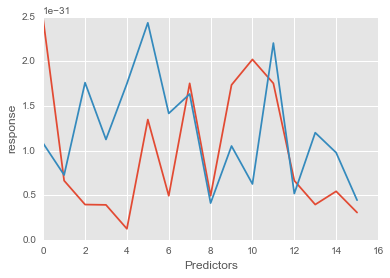

In [99]:
# sns.swarmplot(x = df_Kbest_eval.index , y = df_Kbest_eval.Train_MSE , data = df_Kbest_eval)
plt.plot(df_Kbest_eval.index ,  df_Kbest_eval.Train_MSE , label = 'Train  Error')
plt.plot(df_Kbest_eval.index ,  df_Kbest_eval.CV_MSE , label = 'CV  Error')
plt.xlabel('Predictors')
plt.ylabel('response')
plt.title('Predictors V/S ')

In [126]:
p = df_Kbest_eval.loc[8 , 'betas']
p.count

<function count>

Findings:
- The list significantly differs from the one what is picked up by Statsmodel however the number of predictors is the same

## Lets try to build a Model on these predictors and see the Test errors

In [108]:
X_new = X[['Room_Board' , 'Books' , 'Personal' , 'PhD' , 'Terminal' , 'SF_RATIO' , 'perc_alumni' , 'Expend' , 'Grad_Rate']]
y_new = y

In [127]:
train_X_red , test_X_red , train_y_red , test_y_red = cross_validation.train_test_split(X_new, y_new , test_size = .2 , random_state =0)

In [129]:
model_red = linear_model.LinearRegression().fit(train_X_red ,train_y_red )
model_red.score(train_X_red ,train_y_red)


1.0

In [131]:
cross_validation.cross_val_score(model_red , train_X_red , train_y_red, cv = 10).mean()

1.0

In [133]:
model_red.score(test_X_red , test_y_red)

1.0

Findings:
    - A perfect r2 on training ,CV and test Data

# Lets Try Ridge 

In [135]:
alphas = 10**np.linspace(5 , -2 , 10)

In [136]:
# Dataframe to hold the values for splits
df_ridge_eval = pd.DataFrame({'Train_MSE':np.NAN , 'CV_MSE':np.nan , 'alphas':np.nan , 'betas':np.nan}, index = [0])

In [142]:
from sklearn.feature_selection import f_regression
for i in range(0,len(alphas)):
    # creating an empty list to hold the values of coeff
    features = []
    betas = []

    model_ridge = linear_model.Ridge(alpha = alphas[i] ,solver = 'lsqr' ,normalize = True).fit(train_X , train_y )
    # to get the indices for the best parameters
    betas.append(model_ridge.coef_)
    train_score = model_ridge.score(train_X , train_y)
    
    CV_score = cross_validation.cross_val_score(model_ridge , train_X , train_y , scoring = 'r2' ,cv = 10).mean()
    
    
    
#     for j in range(0,len(train_X.columns)):
#         if (indices[j]):
#             print " The currrent value of index selected is- %r " %j
            
#             print " The column value is --%r " %train_X.columns[j]
#             features.append(train_X.columns[j])
#         else:
#             continue
        
        
#    train_X_new = Kbest.fit_transform(train_X , train_y)
#     print train_X_new.shape
#     print test_X.shape
    
    
    # populating the Data Frame
    df_ridge_eval.loc[i , 'Train_MSE'] = train_score
    df_ridge_eval.loc[i , 'CV_MSE'] = CV_score
    #print coeff 
    df_ridge_eval.loc[i , 'betas'] = ", ".join(str(x) for x in betas)
    df_ridge_eval.loc[i , 'alphas'] = alphas[i]


In [143]:
df_ridge_eval

,CV_MSE,Train_MSE,alphas,betas
0,-0.009017,0.000340,100000.000000,[ 9.99830029e-06 9.99830029e-06 9.9983002...
1,-0.007306,0.002035,16681.005372,[ 5.98873924e-05 5.98873924e-05 5.9887392...
2,0.002861,0.012108,2782.559402,[ 0.0003572 0.0003572 0.0003572 0.0003572 ...
3,0.060704,0.069414,464.158883,[ 0.00207832 0.00207832 0.00207832 0.002078...
4,0.321363,0.327657,77.426368,[ 0.01059026 0.01059026 0.01059026 0.010590...
5,0.811862,0.813607,12.915497,[ 0.03342749 0.03342749 0.03342749 0.033427...
6,0.987230,0.987349,2.154435,[ 0.05220723 0.05220723 0.05220723 0.052207...
7,0.999567,0.999571,0.359381,[ 0.05760574 0.05760574 0.05760574 0.057605...
8,0.999988,0.999988,0.059948,[ 0.05861682 0.05861682 0.05861682 0.058616...
9,1.000000,1.000000,0.010000,[ 0.05878895 0.05878895 0.05878895 0.058788...


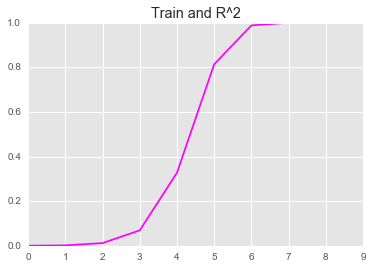

In [151]:
plt.plot(df_ridge_eval.index , df_ridge_eval.Train_MSE , color = 'Magenta' )
plt.title('Train and R^2')


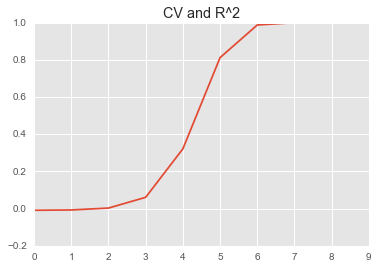

In [148]:
plt.plot(df_ridge_eval.index , df_ridge_eval.CV_MSE )
plt.title('CV and R^2')

# Lets try Lasso

In [155]:
df_lasso_eval = pd.DataFrame({'Train_MSE':np.NAN , 'CV_MSE':np.nan , 'alphas':np.nan , 'betas':np.nan}, index = [0])

In [156]:
from sklearn.feature_selection import f_regression
for i in range(0,len(alphas)):
    # creating an empty list to hold the values of coeff
    features = []
    betas = []

    model_lasso = linear_model.Lasso(alpha = alphas[i]  ,normalize = True).fit(train_X , train_y )
    # to get the indices for the best parameters
    betas.append(model_lasso.coef_)
    train_score = model_lasso.score(train_X , train_y)
    
    CV_score = cross_validation.cross_val_score(model_lasso , train_X , train_y , scoring = 'r2' ,cv = 10).mean()
    
    
    
#     for j in range(0,len(train_X.columns)):
#         if (indices[j]):
#             print " The currrent value of index selected is- %r " %j
            
#             print " The column value is --%r " %train_X.columns[j]
#             features.append(train_X.columns[j])
#         else:
#             continue
        
        
#    train_X_new = Kbest.fit_transform(train_X , train_y)
#     print train_X_new.shape
#     print test_X.shape
    
    
    # populating the Data Frame
    df_lasso_eval.loc[i , 'Train_MSE'] = train_score
    df_lasso_eval.loc[i , 'CV_MSE'] = CV_score
    #print coeff 
    df_lasso_eval.loc[i , 'betas'] = ", ".join(str(x) for x in betas)
    df_lasso_eval.loc[i , 'alphas'] = alphas[i]


In [157]:
df_lasso_eval

,CV_MSE,Train_MSE,alphas,betas
0,-0.009360,0.000000,100000.000000,[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
1,-0.009360,0.000000,16681.005372,[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
2,-0.009360,0.000000,2782.559402,[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
3,-0.009360,0.000000,464.158883,[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
4,-0.009360,0.000000,77.426368,[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
5,-0.009360,0.000000,12.915497,[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
6,-0.009360,0.000000,2.154435,[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
7,-0.009360,0.000000,0.359381,[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
8,-0.009360,0.000000,0.059948,[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
9,0.717192,0.688781,0.010000,[ 0.4421299 0. 0. 0. ...


In [158]:
df_lasso_eval.loc[9 , 'betas']

'[ 0.4421299  0.         0.         0.         0.         0.         0.         0.\n  0.         0.         0.         0.         0.         0.         0.         0.\n  0.       ]'

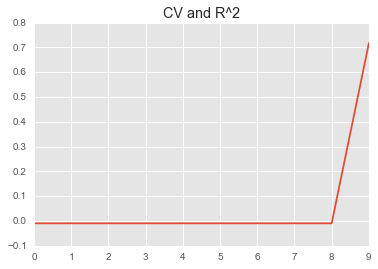

In [160]:
plt.plot(df_lasso_eval.index , df_lasso_eval.CV_MSE )
plt.title('CV and R^2')